In [264]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree, linear_model, neighbors, svm, naive_bayes
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import scikitplot as sckplt

In [186]:
# setting OS directory
os.chdir('C:\\Users\\rckar\\OneDrive\\Documents\\MSBA\\Fall Semester\\6420 Predictive Analytics\\HW2')

In [213]:
# Reading Data
car = pd.read_csv("car.data", header = None)

In [214]:
# Renaming column names
col_names = ['buying_price','maint_price',
                 'doors','persons','lug_boot_size','safety',
                 'eval_class']

car.columns = col_names

In [215]:
car.describe()

,buying_price,maint_price,doors,persons,lug_boot_size,safety,eval_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,med,low,unacc
freq,432,432,432,576,576,576,1210


In [216]:
car.head()

,buying_price,maint_price,doors,persons,lug_boot_size,safety,eval_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [217]:
ord_mapper = {'vhigh':3, 
                'high':2,
                'med':1,
             'low':0}
car['BuyingPrice_ord_coded'] = car['buying_price'].replace(ord_mapper)

In [218]:
ord_mapper = {'vhigh':3, 
                'high':2,
                'med':1,
             'low':0}
car['MaintPrice_ord_coded'] = car['maint_price'].replace(ord_mapper)

In [219]:
ord_mapper = {'2':2,'3':3,'4':4,'5more':5}
car['doors_ord_coded'] = car['doors'].replace(ord_mapper)

In [220]:
ord_mapper = {'2':2,'4':4,'more':6}
car['persons_ord_coded'] = car['persons'].replace(ord_mapper)

In [221]:
ord_mapper = {'big':2,'med':1,'small':0}
car['LugBootSize_ord_coded'] = car['lug_boot_size'].replace(ord_mapper)

In [222]:
ord_mapper = {'high':2,'med':1,'low':0}
car['Safety_ord_coded'] = car['safety'].replace(ord_mapper)

In [223]:
# Factorizing evaluation class for modelling purpose
car['evaluation'],class_names = pd.factorize(car['eval_class'])
print(class_names)
car[['eval_class','evaluation']].head(n=2)

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


,eval_class,evaluation
0,unacc,0
1,unacc,0


In [224]:
# Checking for class imbalance
car['eval_class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: eval_class, dtype: int64

In [228]:
car.head(n=2)

,buying_price,maint_price,doors,persons,lug_boot_size,safety,eval_class,BuyingPrice_ord_coded,MaintPrice_ord_coded,doors_ord_coded,persons_ord_coded,LugBootSize_ord_coded,Safety_ord_coded,evaluation
0,vhigh,vhigh,2,2,small,low,unacc,3,3,2,2,0,0,0
1,vhigh,vhigh,2,2,small,med,unacc,3,3,2,2,0,1,0


In [226]:
car_ord_coded = car.iloc[:,7:14]

In [229]:
car_ord_coded.head(n=2)

,BuyingPrice_ord_coded,MaintPrice_ord_coded,doors_ord_coded,persons_ord_coded,LugBootSize_ord_coded,Safety_ord_coded,evaluation
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0


In [230]:
car_category = car.iloc[:,[0,1,2,3,4,5,13]]

In [232]:
car_category.head(n=2)

,buying_price,maint_price,doors,persons,lug_boot_size,safety,evaluation
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0


In [233]:
#car_ohe = pd.get_dummies(car_ohe,columns=['buying_price','maint_price','doors','persons','lug_boot_size','safety'])


car_category['buying_price'] = pd.factorize(car_category.iloc[:,0])[0]
car_category['maint_price'] = pd.factorize(car_category.iloc[:,1])[0]
car_category['doors'] = pd.factorize(car_category.iloc[:,2])[0]
car_category['persons'] = pd.factorize(car_category.iloc[:,3])[0]
car_category['lug_boot_size'] = pd.factorize(car_category.iloc[:,4])[0]
car_category['safety'] = pd.factorize(car_category.iloc[:,5])[0]

In [234]:
car_category.head(n=2)

,buying_price,maint_price,doors,persons,lug_boot_size,safety,evaluation
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0


# Considering Ordinal variables as categorical

##### Creating the Train and Test data

In [280]:
X_df = car_category.iloc[:,0:6]
y_df = car_category.iloc[:,6:]

In [281]:
X_train, X_test_holdout, y_train, y_test_holdout = train_test_split(X_df, y_df, test_size=0.25)

### Decision Tree

###### Tuning the model using GridSearch Cross Validation to find the values of hyperparameters that best fit the model

In [282]:
# Hyper parameter tuning using GridSearch
param_set ={'max_depth': range(1,20), 'min_samples_split' : range(3,30), 'criterion' : ["gini", "entropy"]}
clf_DTree = tree.DecisionTreeClassifier()
grid_DTree = GridSearchCV(clf_DTree, param_grid = param_set, cv=5, scoring='accuracy')
grid_DTree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20), 'min_samples_split': range(3, 30), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

##### Examining the best model

In [283]:
# examine the best model

print("Best score achieved across all parameters: ", grid_DTree.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_DTree.best_params_)

print(" ")
print("Best estimator")
print(grid_DTree.best_estimator_)

Best score achieved across all parameters:  0.9683641975308642
 
Best parameters
{'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 3}
 
Best estimator
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


##### cross - validation with the best hyperparameters

In [284]:
clf_Dtree_best = grid_DTree.best_estimator_

scores = cross_val_score(clf_Dtree_best, X_train, y_train, cv=5)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.96934866 0.98084291 0.96138996 0.93410853 0.97276265]
 
Mean Accuracy and variance: 0.96 (+/- 0.03)


##### Fitting the Train data and Prediction on test data

In [285]:
clf_Dtree_best.fit(X_train,y_train)

y_pred = clf_Dtree_best.predict(X_test_holdout)
print("Decision Tree : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("Decision Tree : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("Decision Tree : Classification Report")
print(classification_report(y_test_holdout, y_pred))

Decision Tree : accuracy on test data is  97.69 %
 
Decision Tree : Confusion Matrix
 
[[313   0   0   0]
 [  7  87   0   2]
 [  0   0  16   0]
 [  0   1   0   6]]
 
Decision Tree : Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       313
           1       0.99      0.91      0.95        96
           2       1.00      1.00      1.00        16
           3       0.75      0.86      0.80         7

   micro avg       0.98      0.98      0.98       432
   macro avg       0.93      0.94      0.93       432
weighted avg       0.98      0.98      0.98       432



##### ROC curve and Area Under the Curve

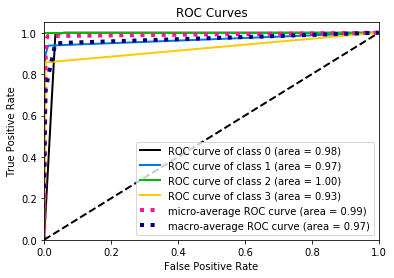

In [286]:
y_probas =  clf_Dtree_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

### Logistic Regression

In [287]:
param_set ={'multi_class' : ['multinomial'], 'C':np.arange(0.2,1,0.1),
            'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs','sag','saga']}

clf_logistic = linear_model.LogisticRegression()

grid_logistic = GridSearchCV(clf_logistic, param_grid = param_set, cv=5, scoring='accuracy')
grid_logistic.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'multi_class': ['multinomial'], 'C': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [288]:
# Single best score achieved across all params
print("Best score achieved across all parameters: ", grid_logistic.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_logistic.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(" ")
print("Best estimator")
print(grid_logistic.best_estimator_)

Best score achieved across all parameters:  0.8341049382716049
 
Best parameters
{'C': 0.9000000000000001, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
 
Best estimator
LogisticRegression(C=0.9000000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)


In [289]:
clf_logistic_best = grid_logistic.best_estimator_

scores = cross_val_score(clf_logistic_best, X_train, y_train, cv=5)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.83141762 0.86206897 0.8030888  0.8255814  0.84824903]
 
Mean Accuracy and variance: 0.83 (+/- 0.04)


In [290]:
clf_logistic_best.fit(X_train,y_train)

y_pred = clf_logistic_best.predict(X_test_holdout)

print("Logistic Regression : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("Logistic Regression : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("Logistic Regression : Classification Report")
print(classification_report(y_test_holdout, y_pred))

Logistic Regression : accuracy on test data is  81.48 %
 
Logistic Regression : Confusion Matrix
 
[[280  24   4   5]
 [ 37  57   1   1]
 [  0   4  11   1]
 [  0   3   0   4]]
 
Logistic Regression : Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       313
           1       0.65      0.59      0.62        96
           2       0.69      0.69      0.69        16
           3       0.36      0.57      0.44         7

   micro avg       0.81      0.81      0.81       432
   macro avg       0.65      0.69      0.66       432
weighted avg       0.82      0.81      0.81       432



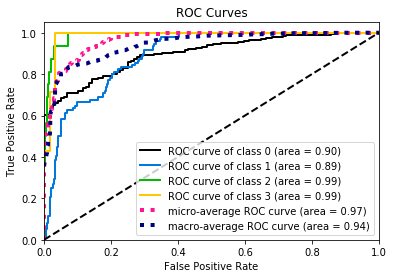

In [291]:
y_probas =  clf_logistic_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

### KNN

In [292]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [293]:
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test_holdout)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [294]:
param_set ={'n_neighbors': list(range(1,30)), 'weights': ["uniform", "distance"]}

clf_knn = neighbors.KNeighborsClassifier()

grid_knn = GridSearchCV(clf_knn, param_grid = param_set, cv=5, scoring='accuracy')
grid_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [295]:
# Single best score achieved across all params
print("Best score achieved across all parameters: ", grid_knn.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_knn.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(" ")
print("Best estimator")
print(grid_knn.best_estimator_)

Best score achieved across all parameters:  0.9513888888888888
 
Best parameters
{'n_neighbors': 13, 'weights': 'distance'}
 
Best estimator
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='distance')


In [296]:
clf_knn_best = grid_knn.best_estimator_

scores = cross_val_score(clf_knn_best, x_train_scaled, y_train, cv=10)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.94656489 0.96183206 0.96153846 0.96923077 0.95384615 0.93846154
 0.97692308 0.96124031 0.9609375  0.92125984]
 
Mean Accuracy and variance: 0.96 (+/- 0.03)


In [297]:
clf_knn_best.fit(X_train,y_train)


y_pred = clf_knn_best.predict(X_test_holdout)

print("KNN : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("KNN : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("KNN : Classification Report")
print(classification_report(y_test_holdout, y_pred))

KNN : accuracy on test data is  90.74 %
 
KNN : Confusion Matrix
 
[[309   3   0   1]
 [ 29  67   0   0]
 [  0   5   9   2]
 [  0   0   0   7]]
 
KNN : Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       313
           1       0.89      0.70      0.78        96
           2       1.00      0.56      0.72        16
           3       0.70      1.00      0.82         7

   micro avg       0.91      0.91      0.91       432
   macro avg       0.88      0.81      0.82       432
weighted avg       0.91      0.91      0.90       432



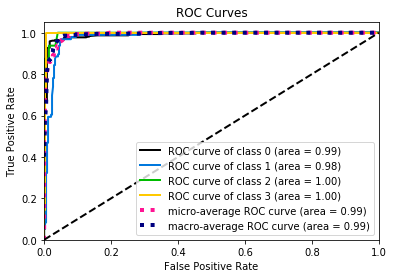

In [298]:
y_probas =  clf_knn_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

### Naive Bayes

In [299]:
clf_NB = naive_bayes.GaussianNB()

scores = cross_val_score(clf_NB, X_train, y_train, cv=5)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.66666667 0.7164751  0.67567568 0.71705426 0.71984436]
 
Mean Accuracy and variance: 0.70 (+/- 0.05)


In [300]:
clf_NB.fit(X_train,y_train)

y_pred = clf_NB.predict(X_test_holdout)

print("Naive Bayes : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("Naive Bayes : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("Naive Bayes : Classification Report")
print(classification_report(y_test_holdout, y_pred))

Naive Bayes : accuracy on test data is  69.68 %
 
Naive Bayes : Confusion Matrix
 
[[269   9  35   0]
 [ 40  13  40   3]
 [  0   0  16   0]
 [  0   3   1   3]]
 
Naive Bayes : Classification Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       313
           1       0.52      0.14      0.21        96
           2       0.17      1.00      0.30        16
           3       0.50      0.43      0.46         7

   micro avg       0.70      0.70      0.70       432
   macro avg       0.52      0.61      0.46       432
weighted avg       0.76      0.70      0.69       432



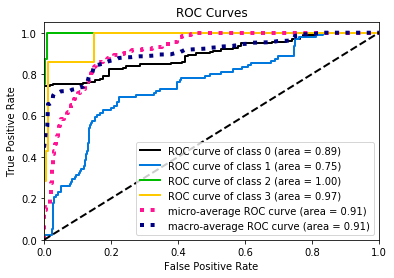

In [301]:
y_probas =  clf_NB.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

### SVM

In [302]:
# Hyper parameter tuning using GridSearch
param_set = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1,2,3,4,5,10,100], 'decision_function_shape':['ovr','ovo']},
                    {'kernel': ['linear'], 'C': [1,2,3,4,5,10,100], 'decision_function_shape':['ovr','ovo']}]
clf_SVC = svm.SVC(probability=True)
grid_SVC = GridSearchCV(clf_SVC, param_grid = param_set, cv=5)
grid_SVC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 2, 3, 4, 5, 10, 100], 'decision_function_shape': ['ovr', 'ovo']}, {'kernel': ['linear'], 'C': [1, 2, 3, 4, 5, 10, 100], 'decision_function_shape': ['ovr', 'ovo']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [303]:
# examine the best model

print("Best score achieved across all parameters: ", grid_SVC.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_SVC.best_params_)

print(" ")
print("Best estimator")
print(grid_SVC.best_estimator_)

Best score achieved across all parameters:  0.8634259259259259
 
Best parameters
{'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
 
Best estimator
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [304]:
clf_SVC_best = grid_SVC.best_estimator_

scores = cross_val_score(clf_SVC_best, X_train, y_train, cv=10)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.84732824 0.82442748 0.88461538 0.88461538 0.83846154 0.89230769
 0.86923077 0.82170543 0.84375    0.88976378]
 
Mean Accuracy and variance: 0.86 (+/- 0.05)


In [305]:
clf_SVC_best.fit(X_train,y_train)

y_pred = clf_SVC_best.predict(X_test_holdout)
print("SVC : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("SVC : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("SVC : Classification Report")
print(classification_report(y_test_holdout, y_pred))

SVC : accuracy on test data is  83.33 %
 
SVC : Confusion Matrix
 
[[283  22   4   4]
 [ 37  58   0   1]
 [  0   2  12   2]
 [  0   0   0   7]]
 
SVC : Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       313
           1       0.71      0.60      0.65        96
           2       0.75      0.75      0.75        16
           3       0.50      1.00      0.67         7

   micro avg       0.83      0.83      0.83       432
   macro avg       0.71      0.81      0.74       432
weighted avg       0.83      0.83      0.83       432



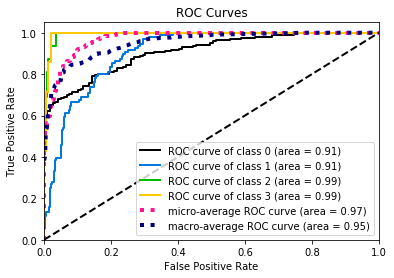

In [306]:
y_probas =  clf_SVC_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()